# Movie Recommendation System - Devanshi Krishna Shah
Movie recommendation system using content-based filtering with [TMDB Dataset from Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

## Importing Libraries 

In [288]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.preprocessing import StandardScaler

## Dataset 

In [289]:
movies = pd.read_csv("./TMDB Dataset/tmdb_5000_movies.csv")
movie_credits = pd.read_csv("./TMDB Dataset/tmdb_5000_credits.csv")

In [290]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [291]:
movie_credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [292]:
movies.shape

(4803, 20)

In [293]:
movie_credits.shape

(4803, 4)

### Merging two datasets 

In [294]:
movies.rename(columns={'id': 'movie_id'}, inplace=True)
movies = pd.merge(movies, movie_credits, on=['movie_id','title'], how='inner')

In [295]:
movies.shape

(4803, 22)

In [296]:
movies.head(1)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [297]:
print(movies.dtypes)

budget                    int64
genres                   object
homepage                 object
movie_id                  int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object


In [298]:
for column_name, data_type in movies.iloc[0].items():
    print(f"Column: {column_name}, Data Type: {type(data_type)}")

Column: budget, Data Type: <class 'numpy.int64'>
Column: genres, Data Type: <class 'str'>
Column: homepage, Data Type: <class 'str'>
Column: movie_id, Data Type: <class 'numpy.int64'>
Column: keywords, Data Type: <class 'str'>
Column: original_language, Data Type: <class 'str'>
Column: original_title, Data Type: <class 'str'>
Column: overview, Data Type: <class 'str'>
Column: popularity, Data Type: <class 'numpy.float64'>
Column: production_companies, Data Type: <class 'str'>
Column: production_countries, Data Type: <class 'str'>
Column: release_date, Data Type: <class 'str'>
Column: revenue, Data Type: <class 'numpy.int64'>
Column: runtime, Data Type: <class 'numpy.float64'>
Column: spoken_languages, Data Type: <class 'str'>
Column: status, Data Type: <class 'str'>
Column: tagline, Data Type: <class 'str'>
Column: title, Data Type: <class 'str'>
Column: vote_average, Data Type: <class 'numpy.float64'>
Column: vote_count, Data Type: <class 'numpy.int64'>
Column: cast, Data Type: <class

## Exploratory Data Analysis

In [299]:
movies.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

**Original_title =** Dropping the original_title column as it is the same as title column in 95% cases and for the remaining 5% cases as shown below it is in a different language than. english or is unclear

In [300]:
movies[movies['original_title'] != movies['title']][['movie_id', 'original_title', 'title']]

,movie_id,original_title,title
97,315011,シン・ゴジラ,Shin Godzilla
215,1979,4: Rise of the Silver Surfer,Fantastic 4: Rise of the Silver Surfer
235,2395,Astérix aux Jeux Olympiques,Asterix at the Olympic Games
317,76758,金陵十三釵,The Flowers of War
474,330770,Évolution,Evolution
...,...,...,...
4699,344466,Lumea e a mea,The World Is Mine
4719,40652,Une femme mariée: Suite de fragments d'un film...,The Married Woman
4751,42109,"Gabriela, Cravo e Canela",Gabriela
4790,13898,دایره,The Circle


In [301]:
movies.drop(['original_title'],inplace=True,axis=1)

**Status =** observing that there are 8 movies in the dataset in rumored or post-production state, logically from a recommendation point of view only the movies that are released are recommended. Therefore I will drop the 8 rows and then further drop the status column

In [302]:
movies['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [303]:
movies.drop(movies[(movies['status'] == 'Rumored') | (movies['status'] == 'Post Production')].index, inplace=True)

In [304]:
movies.shape

(4795, 21)

In [305]:
movies.drop(['status'],inplace=True, axis=1)

**Spoken Languages =** Dropping the spoken_languages column as it would hold importance when we knew what language does the user listen to the movies in i.e. collaborative filtering, for now for content-based utilizing only original_language would suffice

**Production Company =** Dropping this column as one production company can be associated with multiple type of genres and one movie can also be associated with multiple production companies. The correlation between content and production company seems far fetched except for some sucha s Disney, Marvel Studios and so on. This column could serve important in the future with more data than 5000 rows but for now in order to maintain simplicity and extract necessary information, the column currently might produce noise in the predictions. 

**Budget, Revenue, Homepage =** Dropping these columns as it would hold importance in predicting similar movies based on content considering they involve the amount of money invested, amoutn of money made and the url link to the homepage respectively

**Tagline =** Dropping this column as 'overview' would give a detailed view of the movie which would suffice for content based filtering, taglines are more from marketing purposes as well.

In [306]:
movies.drop(['spoken_languages','budget','revenue','homepage','production_companies','tagline'],inplace=True,axis=1)

**Popularity=** I found the background for the popularity scores from the following links owing to the fact that the dataset is from the TMDB API. Based on this information, it indicates that popularity score has no upper bound and the factors considered vary from time to time. In addition, due to the lack of range disadvantage, popularity score can be highly skewed as in our case. In addition, popularity score would be necessary in the cases of:
1. Forming a trending list
2. Sorting the recommendations based on popularity
In our case, hence this column can be dropped

[The Movie Database Support](https://www.themoviedb.org/talk/5141d424760ee34da71431b0), [TMDB Popularity Score Caluclation](https://developer.themoviedb.org/docs/popularity-and-trending)

In [307]:
movies['popularity'].describe()

count    4795.000000
mean       21.527415
std        31.831547
min         0.000000
25%         4.723880
50%        12.963328
75%        28.352222
max       875.581305
Name: popularity, dtype: float64

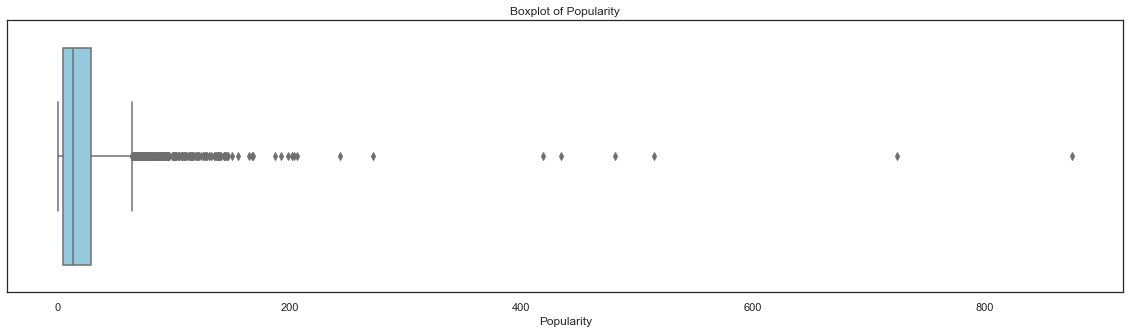

In [308]:
sns.set(style="white")

plt.figure(figsize=(20, 5))
sns.boxplot(x=movies['popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.title('Boxplot of Popularity')
plt.show()

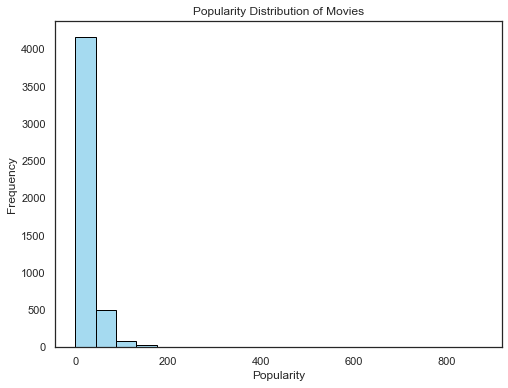

In [309]:
plt.figure(figsize=(8, 6))
sns.histplot(movies['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution of Movies')
plt.show()

In [310]:
movies.drop(['popularity'],inplace=True,axis=1)

**Vote Average, Vote Count =** Dropping these columns as in a purely content based filtering the data related to the movie matters more. However vote average can be used as post filtering to only display similar content based on a particular rating 

In [311]:
movies['vote_average'].describe()

count    4795.000000
mean        6.093306
std         1.190313
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

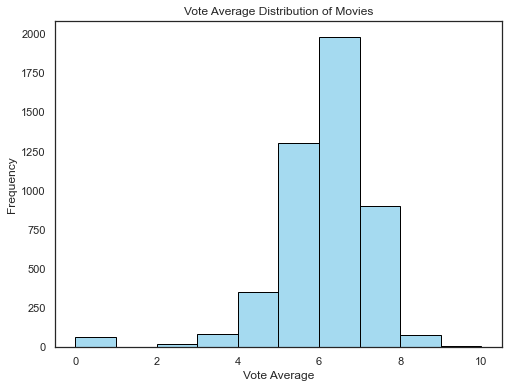

In [312]:
plt.figure(figsize=(8, 6))
sns.histplot(movies['vote_average'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.title('Vote Average Distribution of Movies')
plt.show()

In [313]:
movies.drop(['vote_average','vote_count'],inplace=True,axis=1)

**Genre column preprocessing** 

In [314]:
print("Datatype of column Genre:",type(movies['genres'][0]))

Datatype of column Genre: <class 'str'>


In [315]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [316]:
# Convert the string representations to actual lists of dictionaries
movies['genres'] = movies['genres'].apply(ast.literal_eval)

# Update 'genres' column to contain array of name attribute only
movies['genres'] = movies['genres'].apply(lambda x: [genre['name'] for genre in x])

In [317]:
movies['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

**Cast column preprocessing** 
- based on TMDB documents - Order numbers are used to control the display of credits on a title page - they should be ordered according to the most comprehensive cast list (the one listing the most actors); in most cases, this will be the list appearing in the end credits.
- hence assuming the cast display order is from main characters to supporting characters, I will restrict to the top 4 cast names to be considered in the cast column
- observing a 

In [318]:
print("Datatype of column cast:",type(movies['cast'][0]))

Datatype of column cast: <class 'str'>


In [319]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [320]:
# Convert the string representations to actual lists of dictionaries
movies['cast'] = movies['cast'].apply(ast.literal_eval)

In [321]:
# Check for NaN values in 'cast' column
cast_nan_count = movies['cast'].isna().sum()

# Check for empty strings in 'cast' column
cast_empty_string_count = (movies['cast'] == '').sum()

# Check for NaN values in 'crew' column
crew_nan_count = movies['crew'].isna().sum()

# Check for empty strings in 'crew' column
crew_empty_string_count = (movies['crew'] == '').sum()

# Print the results
print("NaN count in 'cast' column:", cast_nan_count)
print("Empty string count in 'cast' column:", cast_empty_string_count)
print("NaN count in 'crew' column:", crew_nan_count)
print("Empty string count in 'crew' column:", crew_empty_string_count)


NaN count in 'cast' column: 0
Empty string count in 'cast' column: 0
NaN count in 'crew' column: 0
Empty string count in 'crew' column: 0


- ensuring the order maintained in every row list for column 'cast' is in a sorted order where the next order number for the case is >= the current number.
- by ensuring this i can simply use a counter and extract the first four actor names

In [322]:
def count_cast_order(cast_list):
    correct_count = 0
    incorrect_count = 0
    previous_order = -1  # Initialize with a value lower than any possible 'order'
    for cast_member in cast_list:
        if 'order' in cast_member:
            current_order = cast_member['order']
            if current_order < previous_order:
                incorrect_count += 1
                print(cast_list)
            else:
                correct_count += 1
            previous_order = current_order
    return correct_count, incorrect_count

# Apply the function to each row in the 'cast' column
order_counts = movies['cast'].apply(count_cast_order)

# Sum up the counts
total_correct_count = order_counts.apply(lambda x: x[0]).sum()
total_incorrect_count = order_counts.apply(lambda x: x[1]).sum()

print("Total correct orderings:", total_correct_count)
print("Total incorrect orderings:", total_incorrect_count)

Total correct orderings: 106211
Total incorrect orderings: 0


In [323]:
def convert_cast(cast_row):
    counter = 0
    result = []
    while(counter<4 and counter<len(cast_row)):
        result.append(cast_row[counter]['name'])
        counter+=1
    return result
# Update 'genres' column to contain array of name attribute only
movies['cast'] = movies['cast'].apply(lambda x: convert_cast(x))

- there are 41 rows with cast column value as an empty list, as observed these rows have several other column values as null too, I will be handling the null and na cases after pre-processing the rows

In [324]:
len(movies[movies['cast'].apply(len) == 0])

41

In [325]:
movies[movies['cast'].apply(len) == 0][:5]

,genres,movie_id,keywords,original_language,overview,production_countries,release_date,runtime,title,cast,crew
2601,[Family],17644,[],en,"Mom and dad dump son Cody, daughter Abby, her ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-01-01,76.0,Barney's Great Adventure,[],"[{""credit_id"": ""52fe473b9251416c750921ff"", ""de..."
3670,[Family],447027,[],en,After being estranged since her mother's death...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,88.0,Running Forever,[],[]
3992,[],346081,[],en,A ghost hunter uses bottles to capture trouble...,"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0.0,Sardaarji,[],"[{""credit_id"": ""558ab3f4925141076f0001d7"", ""de..."
4009,[Documentary],126509,[],en,2016: Obama's America takes audiences on a gri...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-13,87.0,2016: Obama's America,[],"[{""credit_id"": ""52fe4ae1c3a368484e16bcd7"", ""de..."
4068,[],371085,[],en,The Post War II story of Manhattan born Mike E...,[],2015-01-01,0.0,Sharkskin,[],[]


**Crew column preprocessing** 

In [326]:
print("Datatype of column Crew:",type(movies['crew'][0]))

Datatype of column Crew: <class 'str'>


In [327]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [328]:
# Convert the string representations to actual lists of dictionaries
movies['crew'] = movies['crew'].apply(ast.literal_eval)

- as observed crew column as a detailed view of the complete crew of the movie, for simplicity and relatability purposes i will only extract the director's name with an assumption that the 'job' would be described as a 'Director' or a 'director' only

In [329]:
def convert_crew(crew_row):
    result = []
    for crew in crew_row:
        if crew['job'] == 'Director' or crew['job']=='director':
            result.append(crew['name'])
    return result
# Update 'genres' column to contain array of name attribute only
movies['crew'] = movies['crew'].apply(lambda x: convert_crew(x))

In [330]:
movies['crew']

0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4798                          [Robert Rodriguez]
4799                              [Edward Burns]
4800                               [Scott Smith]
4801                               [Daniel Hsia]
4802    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: crew, Length: 4795, dtype: object

In [331]:
len(movies[movies['crew'].apply(len) == 0])

28

**Release Date column preprocessing** 

In [332]:
movies['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4795, dtype: object

In [333]:
movies[movies['release_date'].isnull()]

,genres,movie_id,keywords,original_language,overview,production_countries,release_date,runtime,title,cast,crew
4553,[],380097,[],en,1971 post civil rights San Francisco seemed li...,[],NaN,0.0,America Is Still the Place,[],[]


- the vision is to extract only the year from release date and find if it has any correlations with the genres 
- to convert release_date into only year asnd save it as an integer value I need to handle NaN values first
- since there is only 1 row with NaN as release date and has several empty columns, dropping this row is a good choice

In [334]:
movies.dropna(subset=['release_date'], inplace=True)

In [335]:
movies['release_date'] =  movies['release_date'].str.split('-', expand=True)[0].astype(int)

**Genre column preprocessing** 

In [336]:
flattened_genres = movies['genres'].explode()
unique_genres = flattened_genres.unique()
print("Unique Genres are:",unique_genres)

Unique Genres are: ['Action' 'Adventure' 'Fantasy' 'Science Fiction' 'Crime' 'Drama'
 'Thriller' 'Animation' 'Family' 'Western' 'Comedy' 'Romance' 'Horror'
 'Mystery' 'History' 'War' 'Music' 'Documentary' 'Foreign' 'TV Movie' nan]


**Correlation between genre and years** 
- as seen from the graph, there is a correlation between genres over the years and this might be important information in our predictions
- however there are 90 unique year values, therefore I am creating a bins comprising 10 years each and converting it into an ordinal column as order matters

In [337]:
genres_dummies = movies['genres'].str.join('|').str.get_dummies()
data = pd.concat([movies['release_date'], genres_dummies], axis=1)
grouped_data = data.groupby('release_date').sum()
grouped_data

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_date,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1925,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1927,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1929,0,0,0,0,0,0,2,0,0,0,0,0,1,0,2,0,0,1,0,0
1930,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,56,36,17,71,37,10,110,22,21,0,8,25,12,5,25,27,2,53,3,1
2014,54,37,14,62,27,7,110,23,16,0,7,21,9,15,24,26,0,66,10,3
2015,46,35,13,52,26,7,93,17,10,0,9,33,8,20,22,28,0,67,2,7


In [338]:
# Group years into groups of 10
grouped_data['year_group'] = (grouped_data.index // 10) * 10
grouped_data = grouped_data.groupby('year_group').sum()
grouped_data

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
year_group,,,,,,,,,,,,,,,,,,,,
1910,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,4,0,0,0,0,0,1,0,3,1,0,1,1,0
1930,2,3,1,7,0,0,8,2,2,0,1,0,3,0,8,0,0,0,3,0
1940,2,1,3,1,2,0,16,5,2,0,2,0,4,4,8,0,0,2,2,3
1950,4,3,0,4,3,0,20,0,0,0,4,1,4,1,10,2,0,2,3,3
1960,17,14,1,15,10,0,42,7,1,1,12,5,8,6,13,5,1,15,7,11
1970,33,29,0,26,13,2,49,7,6,0,7,15,9,5,16,27,0,26,9,4
1980,84,75,4,82,32,1,100,19,36,0,17,59,12,11,37,55,0,71,12,9
1990,200,127,26,317,147,3,396,79,84,6,27,67,20,71,168,92,0,225,17,10


In [339]:
# Convert to Plotly figure for interactivity
fig = go.Figure()

for column in grouped_data.columns:
    if column != 'year_group':
        fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data[column], mode='lines', name=column))

fig.update_xaxes(title_text='10-Year Groups', tickmode='array', tickvals=grouped_data.index, ticktext=grouped_data.index)
fig.update_yaxes(title_text='Count')

fig.update_layout(title='Count of Movies by Genre Over the Years')
pio.show(fig)

In [340]:
bins = list(grouped_data.index.values)
bins.append(float('inf'))
bins

[1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, inf]

In [341]:
#right=False, intervals are closed on the left side, meaning that the left endpoint of each interval is included in the interval, while the right endpoint is excluded.
movies['release_year_bin'] = pd.cut(movies['release_date'], bins=bins, labels=range(1,len(bins)), right=False)

In [342]:
movies.drop(['release_date'],inplace=True,axis=1)

In [343]:
movies.head(2)

,genres,movie_id,keywords,original_language,overview,production_countries,runtime,title,cast,crew,release_year_bin
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",162.0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],10
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",169.0,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],10


**Runtime column preprocessing** 

In [344]:
movies['runtime'].describe()

count    4792.000000
mean      106.937396
std        22.519776
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

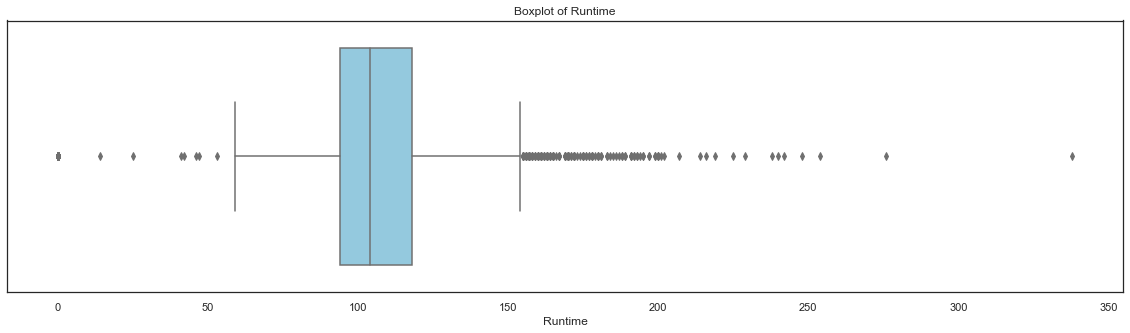

In [345]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=movies['runtime'], color='skyblue')
plt.xlabel('Runtime')
plt.title('Boxplot of Runtime')
plt.show()

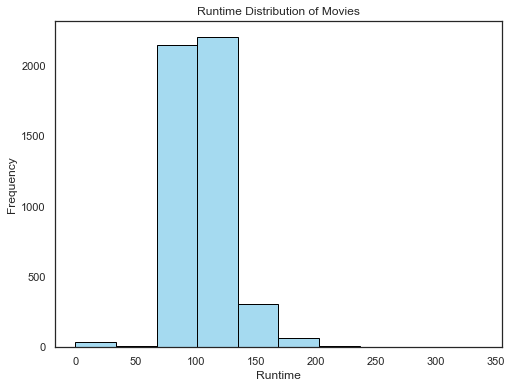

In [346]:
plt.figure(figsize=(8, 6))
sns.histplot(movies['runtime'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Runtime Distribution of Movies')
plt.show()

- there are clearly two outliers with runtime > 254, I'll be dropping these two rows for simplicity

In [349]:
movies[movies['runtime']>250]

,genres,movie_id,keywords,original_language,overview,production_countries,runtime,title,cast,crew,release_year_bin
1922,"[War, Drama, History]",10655,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 4097...",en,Summer 1863. The Confederacy pushes north into...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",254.0,Gettysburg,"[Jeff Daniels, Tom Berenger, Martin Sheen, Sam...",[Ronald F. Maxwell],9
2384,"[Crime, Drama, Thriller, History]",43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,"The story of Venezuelan revolutionary, Ilich R...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",338.0,Carlos,"[Edgar Ramírez, Alexander Scheer, Fadi Abi Sam...",[Olivier Assayas],11
2631,[Drama],112430,"[{""id"": 11162, ""name"": ""miniseries""}]",en,Real-life figures from the Cold War era mix wi...,[],276.0,The Company,"[Chris O'Donnell, Alfred Molina, Michael Keato...",[Mikael Salomon],10


In [350]:
movies.drop(movies[movies['runtime'] > 270].index, inplace=True)

In [351]:
movies['runtime'].describe()

count    4790.000000
mean      106.853862
std        22.141102
min         0.000000
25%        94.000000
50%       103.500000
75%       118.000000
max       254.000000
Name: runtime, dtype: float64

**Original Language =** for this column since there are 37 unique values during modeling there are two methods i ca opt for, the ideal method being one hot encoding, however due to the high number of variables I believe frequency encoding would be a good tradeoff to accept, other option would be to combine them into distinct categories with languages having count < 10 into one category as others this would have to experimented with during training

In [354]:
print("Number of unique original languages=", len(movies['original_language'].unique()))
print("Unique original languages=", movies['original_language'].unique())

Number of unique original languages= 37
Unique original languages= ['en' 'ja' 'fr' 'zh' 'es' 'de' 'hi' 'ru' 'ko' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'pt' 'is' 'tr' 'cs' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']


In [355]:
movies['original_language'].value_counts()

en    4495
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ar       2
ro       2
id       2
ta       2
sl       1
no       1
ps       1
ky       1
vi       1
hu       1
pl       1
af       1
nb       1
cs       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

**Production Countries =** Dropping this column, becaause there are 89 unique values with a row being associated with multiple countries as well. I believe this column would be more valuable for filtering based on a user's location, particularly for content-based filtering the remaining columns provide extensive information for comparison

In [358]:
print("Datatype of column Crew:",type(movies['production_countries'][0]))

Datatype of column Crew: <class 'str'>


In [359]:
movies['production_countries'][0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [360]:
# Convert the string representations to actual lists of dictionaries
movies['production_countries'] = movies['production_countries'].apply(ast.literal_eval)

In [361]:
# Update 'production_countries' column to contain array of name attribute only
movies['production_countries'] = movies['production_countries'].apply(lambda x: [country['name'] for country in x])

In [362]:
movies['production_countries']

0       [United States of America, United Kingdom]
1                       [United States of America]
2       [United Kingdom, United States of America]
3                       [United States of America]
4                       [United States of America]
                           ...                    
4798            [Mexico, United States of America]
4799                                            []
4800                    [United States of America]
4801             [United States of America, China]
4802                    [United States of America]
Name: production_countries, Length: 4792, dtype: object

In [363]:
len(movies[movies['production_countries'].apply(len) == 0])

169

In [365]:
flattened_countries = movies['production_countries'].explode()
unique_countries = flattened_countries.unique()
print("Number of Unique Countries are:",len(unique_countries))
print("Unique Countries are:",unique_countries)

Number of Unique Countries are: 89
Unique Countries are: ['United States of America' 'United Kingdom' 'Jamaica' 'Bahamas'
 'Dominica' 'Czech Republic' 'Poland' 'Slovenia' 'New Zealand' 'Germany'
 'China' 'Canada' 'Italy' 'Japan' 'Malta' 'Australia' 'France' 'Belgium'
 'India' 'Netherlands' 'Spain' 'United Arab Emirates' 'Hong Kong' 'Taiwan'
 'Ireland' 'Morocco' nan 'Hungary' 'Singapore' 'Norway' 'Sweden'
 'South Africa' 'Russia' 'Romania' 'Mexico' 'Monaco' 'Switzerland'
 'Pakistan' 'Malaysia' 'Finland' 'Iceland' 'Denmark' 'Tunisia'
 'Philippines' 'Bulgaria' 'South Korea' 'Brazil' 'Peru' 'Luxembourg'
 'Bosnia and Herzegovina' 'Kazakhstan' 'Portugal' 'Aruba'
 'Libyan Arab Jamahiriya' 'Serbia' 'Ukraine' 'Chile' 'Argentina' 'Panama'
 'Austria' 'Greece' 'Lithuania' 'Cambodia' 'Thailand' 'Slovakia' 'Israel'
 'Fiji' 'Serbia and Montenegro' 'Turkey' 'Nigeria' 'Cyprus' 'Jordan'
 'Bolivia' 'Ecuador' 'Colombia' 'Egypt' 'Bhutan' 'Lebanon'
 'Kyrgyz Republic' 'Algeria' 'Indonesia' 'Guyana' 'Iran' 'G

In [366]:
movies.drop(['production_countries'],inplace=True,axis=1)

In [367]:
movies.columns

Index(['genres', 'movie_id', 'keywords', 'original_language', 'overview',
       'runtime', 'title', 'cast', 'crew', 'release_year_bin'],
      dtype='object')